Automatically created module for IPython interactive environment

> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE

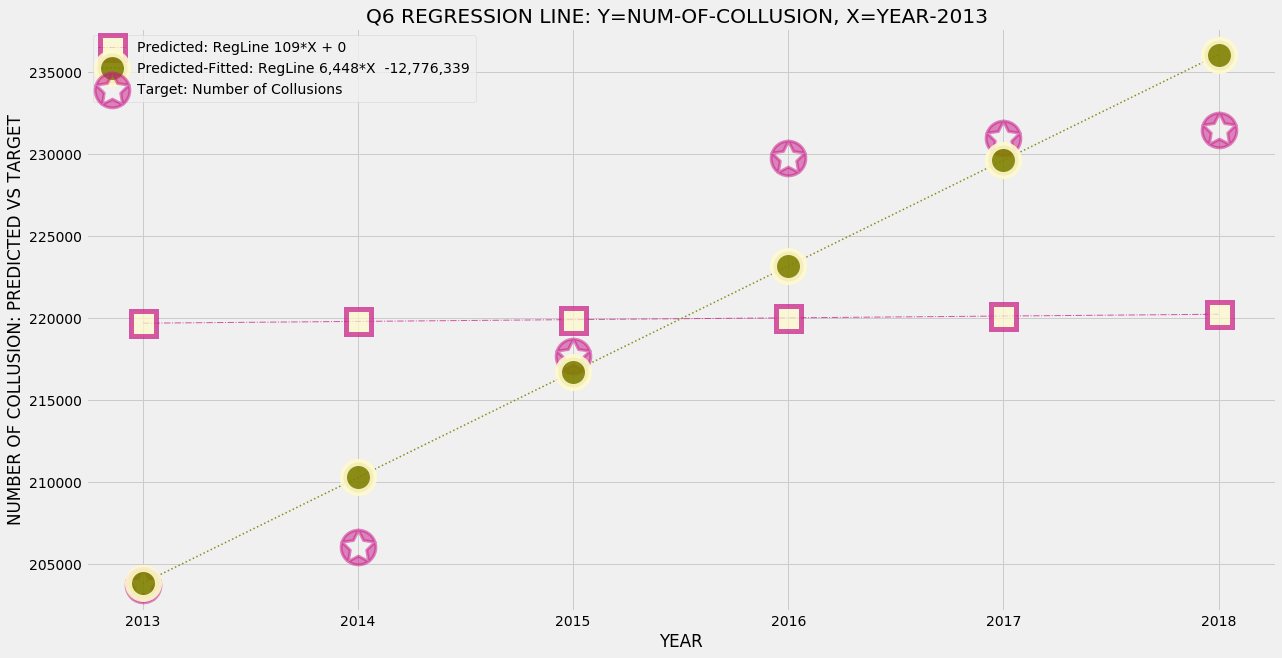

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.simplefilter('ignore')
print(__doc__)
plt.style.use('fivethirtyeight')

from generate_color4_plot import (
    generateRandomDark_c0lor,
    generateRandomLight_c0lor,
    generateRandomMatplotlib_c0lor
    )

def dataFram3NYC(FILE_NAME='NYPD_Motor_Vehicle_Collisions.csv',
                 use_parent_dir=False):
    """
    READS ~1,5 MILLION ROW CSV FILE, RETURNS MASTER DATAFRAME
    use_parent_dir will use parent directory as base directory
    """
    if use_parent_dir == True:
        CURRENTWRK_DIR = os.getcwd()
        BASE_DIR = os.path.dirname(CURRENTWRK_DIR)
    elif use_parent_dir == False:
        BASE_DIR = os.getcwd()


#     STATIC_FOLDER = os.path.dirname(BASE_DIR)
    STATIC_FOLDER = ''
    # FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv'
    PATH_COMPILED = os.path.join(BASE_DIR, STATIC_FOLDER, FILE_NAME)
    print('\n> > > > dataFrameNYC() now reading csv with file path below')
    print(PATH_COMPILED)
    print()
    _df = pd.read_csv(PATH_COMPILED, encoding="iso-8859-1", low_memory=False)
    col_list = list(_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip(col_ind3x, col_list))
    print(col_dict)
    return _df

def focusDataframer(columns2keep_list = [0,23]):
    """
    MODIFIED DATA FRAMER, PRINTS OUT ALL COLUMN INDEX/NAMES, 
    REQUIRES A LIST OF REQUESTED COLUMN INDEXES AS INTEGERS
    RETURNS A DATAFRAME WITH ONLY USER-SELECTED COLUMNS
    """
    pass
    raw_df = dataFram3NYC(use_parent_dir=True)
    col_list = list(raw_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip( col_ind3x, col_list))
    col_final = []
    for index in columns2keep_list:
        add_this_column = col_dict[index]
        col_final.append(add_this_column)
    col_final = [
        str(index)
        for index in col_final
    ]
    _df = raw_df[
        col_final
    ]
    print()
    print('> > > focusDataframer(columns2keep_list = [indexNo_as_int00, indexNo_as_int01]')
    print('> > >                * selected columns:')
    for selected_col,keepthis in zip(columns2keep_list,col_final):
        print('> > >                                  ', selected_col,' keeps ', keepthis)
    return _df

def gr0upYearByCollusionCount(focus_df = focusDataframer()):
    """
    REQUIRES A DATAFRAME WITH A TARGET FIELD NAMED 'DATE',
    GROUP YEAR BY COLLUSION COUNT
    """
    pass
    print()
    print('> > > > gr0upYearByCollusionCount() calculated collusion count under year: ')
    focus_df['ye4r'] = [date[-4:] for date in focus_df['DATE']]
    gr0uped_df = focus_df.groupby('ye4r').count().drop(columns = 'DATE')
    gr0uped_df['c0llusionCount'] = [
        collusionCount
        for collusionCount in gr0uped_df['UNIQUE KEY']
    ]
    gr0uped_df = gr0uped_df.drop(columns='UNIQUE KEY')
    check_row_total = gr0uped_df.sum()[0]
    print('> > > > check if sum of all yearly collusion counts add up total row number {:,}'.format(check_row_total))
    print('> > > >                                                                     1,487,383 expected [?]')
    return gr0uped_df

def yearLabeledCollusionCountDF(gr0uped_df=gr0upYearByCollusionCount(),
                                year_first=2013,
                                year_last=2018):
    """
    REQUIRES GROUPED DATAFRAME WITH YEAR ON INDEX AND COLLUSION COUNT AS VALUES
    """
    pass
    print()
    print(
        '> > > yearLabeledCollusionCountDF() returns a _df with below years on label: '
    )
    year_last += 1
    yrs_list = [
        int(year) for year in np.arange(int(year_first), int(year_last))
    ]
    print(yrs_list)
    yearLabel_df = gr0uped_df.T
    yearStr_list = [str(year) for year in yrs_list]
    return yearLabel_df[yearStr_list].T


def cut_st4r(n):
    """
    this is a code of a negative-spaced-star-shaped SVG path that will
    mark rounds help player  see important date points easily
    """
    star = mpath.Path.unit_regular_star(n)
    circle = mpath.Path.unit_circle()
    # concatenate the circle with an internal cutout of the star
    verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
    codes = np.concatenate([circle.codes, star.codes])
    cut_star = mpath.Path(verts, codes)
    return cut_star

def snsRegressionPlot(df=yearLabeledCollusionCountDF().T,
                      yTarget='c0llusionCount',
                      gr0up_df=yearLabeledCollusionCountDF()):
    """
    df is a pivoted dataframe, yTarget is the value to be predicted
    """
    c0lorList = [
        'coral', 'goldenrod', 'salmon', 'orangered', 'darkolivegreen',
        'olivedrab', 'cadetblue', 'palevioletred', 'mediumorchid',
        'darkorange', 'teal', 'cyan', 'aqua'
    ]

    plt.rcParams["font.size"] = 12

    _colList_ = df.columns
    plt.figure(figsize=(15, 9))
    plt.title('Q6 - NO-OF-COLLUSIONS vs YEAR: TREND ANALYSIS')
    plt.xlabel('YEAR ')
    plt.ylabel('NUMBER OF COLLUSIONS')
    int_for_x_axis = [int(year) for year in gr0up_df.index]
    x_axis = pd.Series(int_for_x_axis)
    y_axis = pd.Series(gr0up_df[yTarget])
    rand1nt = np.random.randint(0, len(c0lorList))
    c0lor = c0lorList[rand1nt]
    sns.regplot(
        y=y_axis, x=x_axis, data=df, fit_reg=True, color=c0lor, marker='o')
    plt.grid(True)
    plt.show()
    return None

# snsRegressionPlot()

def describeRegressionLine(gr0up_df = yearLabeledCollusionCountDF(),
                           year_first = 2013,
                           year_last = 2018):
    """
    Q-6: Consider the total number of collisions each year from 2013-2018. 
    * Is there an apparent trend? 
    * Fit a linear regression for the number of collisions per year and report its slope.
    """
    # Create linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)
    # ------------------------------------
    int_for_x_axis = [int(year)for year in gr0up_df.index]
    y_axis = pd.Series(gr0up_df['c0llusionCount'])
    year_last += 1
    x_ax1s = np.arange(int(year_first), int(year_last))
    x_ax2s = x_ax1s.reshape(-1, 1)
    #  x_ax2s should be reshaped for R sq matrix
    regr.fit(x_ax2s, y_axis)
    y_predict = regr.predict(x_ax2s)
    # predicted number can not have decimals thus to be rounded to an integer
    y_pred1ct = [int(predicted.__round__(0)) for predicted in y_predict]
    print('> > > > describeRegressionLine() provides brief info on plotted regression line')
    print('> > > > Coefficients: ', regr.coef_[0])
    print('> > > > Intercept: ', regr.intercept_)
    label_coef = '{:,.0f}'.format(regr.coef_[0])
    label_intercept = '{:,.0f}'.format(regr.intercept_)
    print('> > > > * Equation of regression line ', label_coef, 'x + ' , label_intercept)
    print("> > > > Mean squared error: %.2f" % mean_squared_error(y_axis, y_predict))
    print('> > > > R-2-Variance score: %.2f' % r2_score(y_axis, y_predict))
    print('> > > >   ')
    print('> > > > *: positive trend observed meaning that every year')
    print('> > > >    there is an increase in number of collusions aprx 6,500')
    print()
    return None


def describeAnotherRegressionLine(gr0up_df = yearLabeledCollusionCountDF(),
                           year_first = 2013,
                           year_last = 2018):
    """
    MODIFIED  VERSION FOR FORCED INTERCEPT ZERO, TO CHECK/SHOW TREND IS POSITIVE 
    Q-6: Consider the total number of collisions each year from 2013-2018. 
    * Is there an apparent trend? 
    * Fit a linear regression for the number of collisions per year and report its slope.
    """
    # Create linear regression object
    regr = linear_model.LinearRegression(fit_intercept=False)
    # ------------------------------------
    int_for_x_axis = [int(year)for year in gr0up_df.index]
    y_axis = pd.Series(gr0up_df['c0llusionCount'])
    year_last += 1
    x_ax1s = np.arange(int(year_first), int(year_last))
    x_ax2s = x_ax1s.reshape(-1, 1)
    #  x_ax2s should be reshaped for R sq matrix
    regr.fit(x_ax2s, y_axis)
    y_predict = regr.predict(x_ax2s)
    # predicted number can not have decimals thus to be rounded to an integer
    y_pred1ct = [int(predicted.__round__(0)) for predicted in y_predict]
    print('> > > > describeRegressionLine() provides brief info on plotted regression line')
    print('> > > > Coefficients: ', regr.coef_[0])
    print('> > > > Intercept: ', regr.intercept_)
    label_coef = '{:,.0f}'.format(regr.coef_[0])
    label_intercept = '{:,.0f}'.format(regr.intercept_)
    print('> > > > * Equation of regression line ', label_coef, 'x + ' , label_intercept)
    print("> > > > Mean squared error: %.2f" % mean_squared_error(y_axis, y_predict))
    print('> > > > R-2-Variance score: %.2f' % r2_score(y_axis, y_predict))
    print('> > > > *: positive trend means prediction oversees increase every year')
    print('> > > > **  very low r-2-score thus not useful')
    print()
    return None



def prompt_N_plot_regressionLine(
    gr0up_df=yearLabeledCollusionCountDF(),
    year_first=2013,
    year_last=2018,
    c0lor=generateRandomDark_c0lor(),
    c0lor2=generateRandomLight_c0lor(),
    c0lor3=generateRandomDark_c0lor(),
    c0lor4=generateRandomDark_c0lor()
):
    """
    PLOTS REGRESSION LINES WITH EQUATIONS ON LABEL, SCATTERS ACTUAL DATA POINTS
    """
    pass
    describeRegressionLine()
    describeAnotherRegressionLine()
    y_axis = [int(collusionCount) for collusionCount in gr0up_df['c0llusionCount']]
    year_last += 1
    x_ax1s = np.arange(int(year_first), int(year_last))
    x_ax2s = x_ax1s.reshape(-1, 1)

    ###### FIRST SCATTER ACTUAL DATA POINTS #####
    plt.figure(figsize=(19, 10))
    plt.scatter(
        x_ax2s,
        y_axis,
        s=1200,
        color=c0lor,
        marker=cut_st4r(5),
        edgecolors=c0lor, 
        linewidth=3,
        alpha=0.5,
        label='Target: Number of Collusions'
    )
    ###### SECOND, FIT_INTERCEPT=FALSE ######
    # now we generate labels for regression lines plotted
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(x_ax2s, y_axis)
    y_predict = regr.predict(x_ax2s)
    # predicted number can not have decimals thus to be rounded to an integer
    y_pred1ct = [int(predicted.__round__(0)) for predicted in y_predict]
    label_coef = '{:,.0f}'.format(regr.coef_[0])
    label_intercept = '{:,.0f}'.format(regr.intercept_)
    lab3l = 'Predicted: RegLine ' + label_coef + '*X + ' + label_intercept
    plt.plot(
        x_ax2s,
        y_predict,
        color=c0lor3,
        marker='s',
        markersize= 25,
        markeredgewidth=5,
        markeredgecolor=c0lor3,
        markerfacecolor=c0lor2,
        linestyle='dashdot',
        linewidth=1,
        alpha=0.7,
        label=lab3l)
#     ---------------------
    ###### THIRD, FITTED REGRESSION LINE #####
    r3gr = linear_model.LinearRegression(fit_intercept=True)
    r3gr.fit(x_ax2s, y_axis)
    y_pr3dict = r3gr.predict(x_ax2s)
    # predicted number can not have decimals thus to be rounded to an integer
    y_pr3d1ct = [int(predicted.__round__(0)) for predicted in y_pr3dict]
    label_co3f = '{:,.0f}'.format(r3gr.coef_[0])
    label_interc3pt = '{:,.0f}'.format(r3gr.intercept_)
    l4b3l = 'Predicted-Fitted: RegLine ' + label_co3f + '*X  ' + label_interc3pt
    plt.plot(x_ax2s,
             y_pr3dict,
             color=c0lor4,
             marker='o',
             markersize=30,
             markeredgewidth=7,
             markeredgecolor=c0lor2,
             markerfacecolor=c0lor4,
             linestyle='dotted',
             linewidth=1.5,
             alpha=0.9,
             label=l4b3l)
    plt.legend(loc='best')
    plt.rcParams["font.size"] = 14
    plt.title('Q6 REGRESSION LINE: Y=NUM-OF-COLLUSION, X=YEAR-2013 ')
    plt.xlabel('YEAR')
    plt.ylabel('NUMBER OF COLLUSION: PREDICTED VS TARGET')
    file2save = 'Q6_REGRESSION_LINES_NUM-COLLUSION_YEAR.png'
    plt.savefig(file2save)
    plt.show()
    return None

prompt_N_plot_regressionLine()